Notebook to check Hindcast and compare to Nowcast

## Preliminaries ##

In [103]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np

from salishsea_tools import teos_tools, viz_tools
from salishsea_tools import visualisations as vis
%matplotlib inline

In [104]:
date = '20170228'
datem = '28feb17'

In [105]:
mesh_mask_1 = NC.Dataset(
    '/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc'
) 
mesh_mask_2 = NC.Dataset(
    '/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

tmask1 = 1 - mesh_mask_1.variables['tmask'][0]
tmask2 = 1 - mesh_mask_2.variables['tmask'][0]


In [106]:
grid1 = NC.Dataset(
    '/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathy_downonegrid2.nc',
    'r')
bathy1 = grid1.variables['Bathymetry'][:, :]
grid2 = NC.Dataset(
    '/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathymetry_201702.nc',
    'r')
bathy2 = grid2.variables['Bathymetry'][:, :]
lats = grid2.variables['nav_lat'][:]
lons = grid2.variables['nav_lon'][:]


In [107]:
nowcast_loc = '/results/SalishSea/nowcast-green/'
#hindcast_loc = '/results/SalishSea/hindcast/'
hindcast_loc = '/results/SalishSea/hindcast/'
file_core = 'SalishSea_1d_'
timecount = 0

## Grid T ##

In [108]:
filename = nowcast_loc + datem + '/' + file_core + date + '_' + date + '_grid_T.nc'
print(filename)
fT1 = NC.Dataset(filename, 'r')
eta1 = fT1.variables['sossheig'][timecount]
sal1 = fT1.variables['vosaline'][timecount]
fT1.close()
filename = hindcast_loc + datem + '/' + file_core + date + '_' + date + '_grid_T.nc'
print(filename)
fT2 = NC.Dataset(filename, 'r')
eta2 = fT2.variables['sossheig'][timecount]
sal2 = fT2.variables['vosaline'][timecount]
fT2.close()

/results/SalishSea/nowcast-green/28feb17/SalishSea_1d_20170228_20170228_grid_T.nc
/results/SalishSea/hindcast/28feb17/SalishSea_1d_20170228_20170228_grid_T.nc


### Sea Surface Height ###

In [109]:
eta1_masked = np.ma.array(eta1, mask=tmask1[0])
eta2_masked = np.ma.array(eta2, mask=tmask2[0])

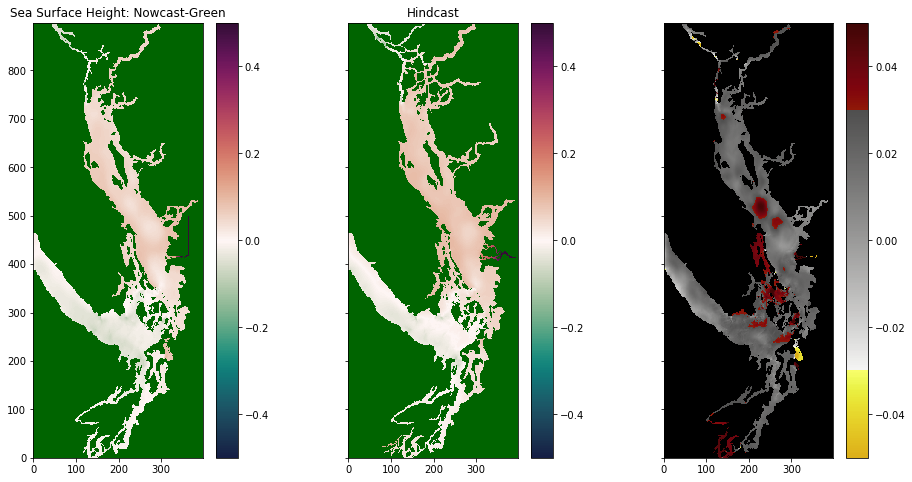

In [110]:
vmax = 0.5
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('darkgreen')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(eta1_masked, cmap=cmap, vmax=vmax, vmin=-vmax)
axs[0].set_title("Sea Surface Height: Nowcast-Green")
cbar = fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(eta2_masked, cmap=cmap, vmax=vmax, vmin=-vmax)
axs[1].set_title("Hindcast")
cbar = fig.colorbar(mesh, ax=axs[1])
# third one
cmap = plt.get_cmap(cm.oxy_r)
cmap.set_bad('black')
viz_tools.set_aspect(axs[2])
mesh = axs[2].pcolormesh(
    eta2_masked - eta1_masked, cmap=cmap, vmax=0.1 * vmax, vmin=-0.1 * vmax)
cbar = fig.colorbar(mesh, ax=axs[2])

### Salinity ###

In [111]:
sal1_masked = np.ma.array(sal1, mask=tmask1)
sal2_masked = np.ma.array(sal2, mask=tmask2)

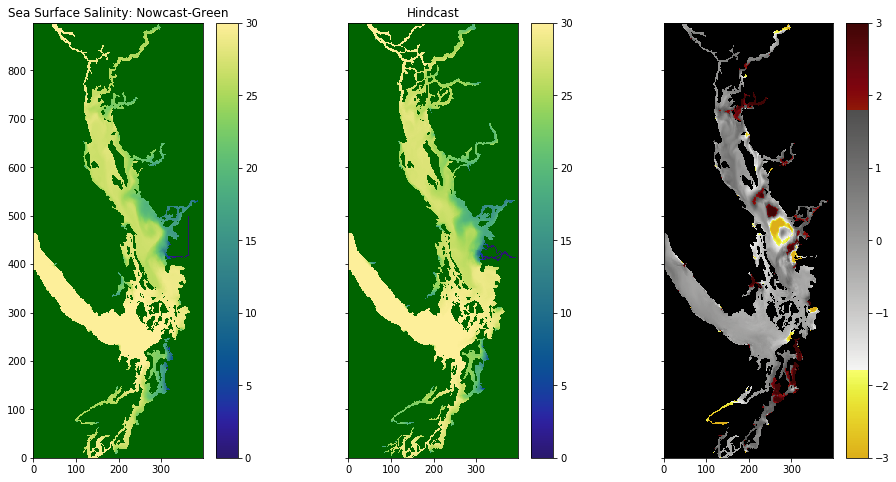

In [112]:
vmax = 30; vmin = 0
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap(cm.haline)
cmap.set_bad('darkgreen')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(sal1_masked[0], cmap=cmap, vmax=vmax, vmin=vmin)
axs[0].set_title("Sea Surface Salinity: Nowcast-Green")
cbar = fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(sal2_masked[0], cmap=cmap, vmax=vmax, vmin=vmin)
axs[1].set_title("Hindcast")
cbar = fig.colorbar(mesh, ax=axs[1])
# third one
cmap = plt.get_cmap(cm.oxy_r)
cmap.set_bad('black')
viz_tools.set_aspect(axs[2])
mesh = axs[2].pcolormesh(
    sal2_masked[0] - sal1_masked[0], cmap=cmap, vmax=0.1 * vmax, vmin=-0.1 * vmax)
cbar = fig.colorbar(mesh, ax=axs[2])

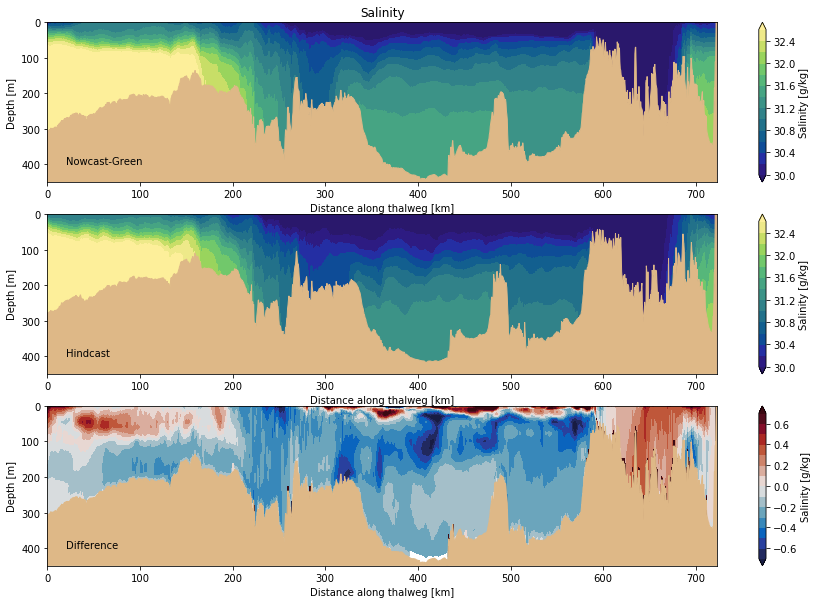

In [113]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
cmap = plt.get_cmap(cm.haline)
# first one
cbar = vis.contour_thalweg(
    axs[0],
    sal1,
    grid1,
    mesh_mask_1,
    np.arange(30, 32.6, 0.2),
    cmap=cmap)
axs[0].set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')
axs[0].text(20, 400, 'Nowcast-Green')
axs[0].set_title('Salinity')
# second one
cbar = vis.contour_thalweg(
    axs[1],
    sal2,
    grid2,
    mesh_mask_2,
    np.arange(30, 32.6, 0.2),
    cmap=cmap)
axs[1].set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')
axs[1].text(20, 400, 'Hindcast')
# difference
cmap = plt.get_cmap(cm.balance)
cmap.set_bad('black')
cbar = vis.contour_thalweg(
    axs[2],
    sal2 - sal1,
    grid1,
    mesh_mask_2,
    np.arange(-0.7, 0.8, 0.1),
    cmap=cmap)
axs[2].set_ylim([450,0])
axs[2].text(20, 400, 'Difference')
cbar.set_label('Salinity [g/kg]')

## PTRC ##

In [114]:
filename = nowcast_loc + datem + '/' + file_core + date + '_' + date + '_ptrc_T.nc'
print(filename)
fT1 = NC.Dataset(filename, 'r')
nitrate1 = fT1.variables['NO3'][timecount]
diatoms1 = fT1.variables['PHY2'][timecount]
DON1 = fT1.variables['DOC'][timecount]
fT1.close()
filename = hindcast_loc + datem + '/' + file_core + date + '_' + date + '_ptrc_T.nc'
print(filename)
fT2 = NC.Dataset(filename, 'r')
nitrate2 = fT2.variables['nitrate'][timecount]
diatoms2 = fT2.variables['diatoms'][timecount]
DON2 = fT2.variables['dissolved_organic_nitrogen'][timecount]
fT2.close()

/results/SalishSea/nowcast-green/28feb17/SalishSea_1d_20170228_20170228_ptrc_T.nc
/results/SalishSea/hindcast/28feb17/SalishSea_1d_20170228_20170228_ptrc_T.nc


### Nitrate ###

In [115]:
nitrate1_masked = np.ma.array(nitrate1, mask=tmask1)  
nitrate2_masked = np.ma.array(nitrate2, mask=tmask2)

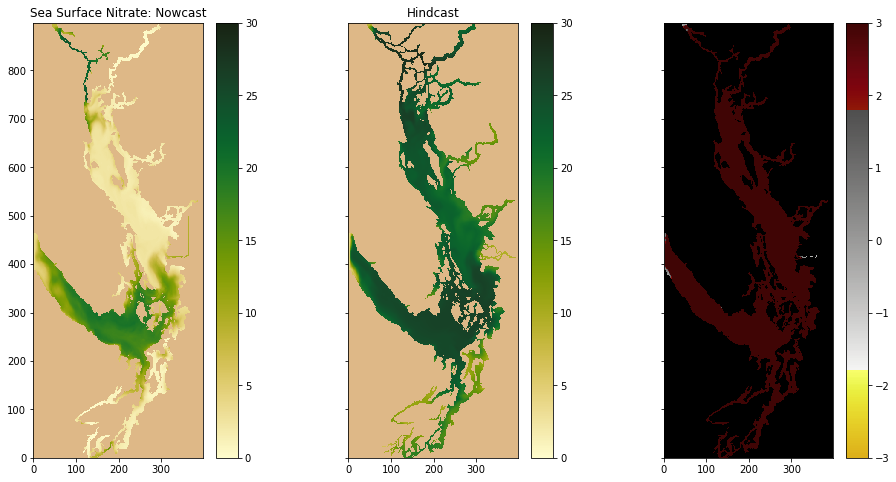

In [116]:
vmax = 30; vmin = 0
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap(cm.speed)
cmap.set_bad('burlywood')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(nitrate1_masked[0], cmap=cmap, vmax=vmax, vmin=vmin)
axs[0].set_title("Sea Surface Nitrate: Nowcast")
cbar = fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(nitrate2_masked[0], cmap=cmap, vmax=vmax, vmin=vmin)
axs[1].set_title("Hindcast")
cbar = fig.colorbar(mesh, ax=axs[1])
# third one
cmap = plt.get_cmap(cm.oxy_r)
cmap.set_bad('black')
viz_tools.set_aspect(axs[2])
mesh = axs[2].pcolormesh(
    nitrate2_masked[0] - nitrate1_masked[0], cmap=cmap, vmax=0.1 * vmax, vmin=-0.1 * vmax)
cbar = fig.colorbar(mesh, ax=axs[2])

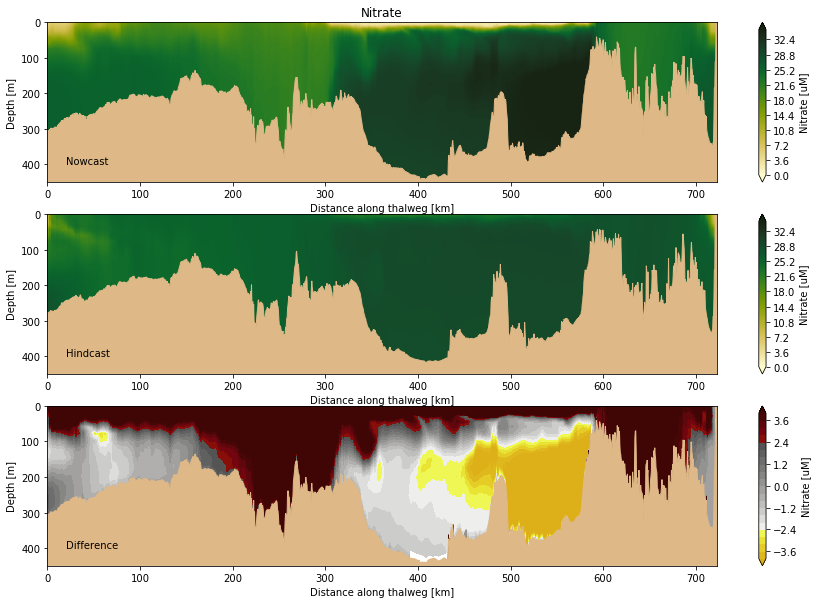

In [117]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
cmap = plt.get_cmap(cm.speed)
# first one
cbar = vis.contour_thalweg(
    axs[0],
    nitrate1,
    grid1,
    mesh_mask_1,
    np.arange(0, 35, 0.2),
    cmap=cmap)
axs[0].set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
axs[0].text(20, 400, 'Nowcast')
axs[0].set_title('Nitrate')
# second one
cbar = vis.contour_thalweg(
    axs[1],
    nitrate2,
    grid2,
    mesh_mask_2,
    np.arange(0, 35, 0.2),
    cmap=cmap)
axs[1].set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
axs[1].text(20, 400, 'Hindcast')
# difference
cmap = plt.get_cmap(cm.oxy_r)
cmap.set_bad('black')
cbar = vis.contour_thalweg(
    axs[2],
    nitrate2 - nitrate1,
    grid1,
    mesh_mask_2,
    np.arange(-4, 4.4, 0.4),
    cmap=cmap)
axs[2].set_ylim([450,0])
axs[2].text(20, 400, 'Difference')
cbar.set_label('Nitrate [uM]')

### Diatoms ###

In [118]:
diatoms1_masked = np.ma.array(diatoms1, mask=tmask1)
diatoms2_masked = np.ma.array(diatoms2, mask=tmask2)

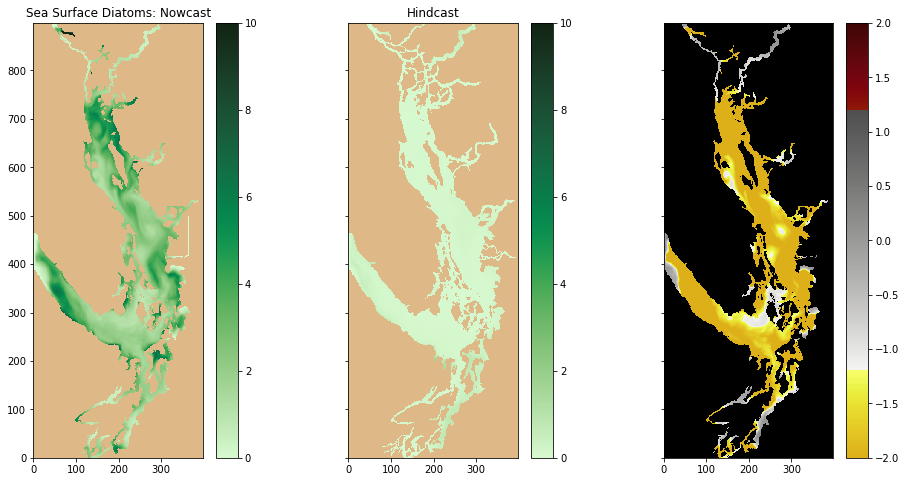

In [119]:
vmax = 10; vmin = 0
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap(cm.algae)
cmap.set_bad('burlywood')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(diatoms1_masked[0], cmap=cmap, vmax=vmax, vmin=vmin)
axs[0].set_title("Sea Surface Diatoms: Nowcast")
cbar = fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(diatoms2_masked[0], cmap=cmap, vmax=vmax, vmin=vmin)
axs[1].set_title("Hindcast")
cbar = fig.colorbar(mesh, ax=axs[1])
# third one
cmap = plt.get_cmap(cm.oxy_r)
cmap.set_bad('black')
viz_tools.set_aspect(axs[2])
mesh = axs[2].pcolormesh(
    diatoms2_masked[0] - diatoms1_masked[0], cmap=cmap, vmax=0.2 * vmax, vmin=-0.2 * vmax)
cbar = fig.colorbar(mesh, ax=axs[2])

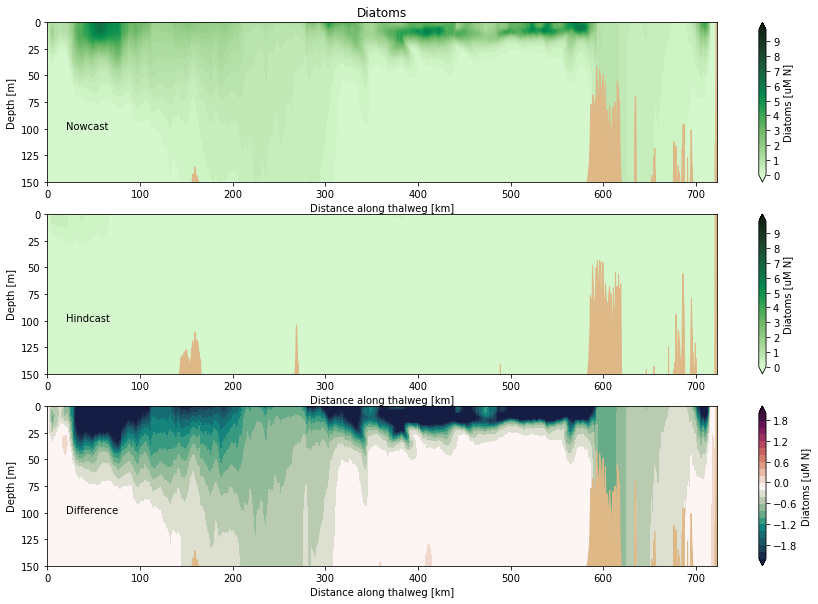

In [120]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
cmap = plt.get_cmap(cm.algae)
# first one
cbar = vis.contour_thalweg(
    axs[0],
    diatoms1,
    grid1,
    mesh_mask_1,
    np.arange(0, 10, 0.2),
    cmap=cmap)
axs[0].set_ylim([150,0])
cbar.set_label('Diatoms [uM N]')
axs[0].text(20, 100, 'Nowcast')
axs[0].set_title('Diatoms')
# second one
cbar = vis.contour_thalweg(
    axs[1],
    diatoms2,
    grid2,
    mesh_mask_2,
    np.arange(0, 10, 0.2),
    cmap=cmap)
axs[1].set_ylim([150,0])
cbar.set_label('Diatoms [uM N]')
axs[1].text(20, 100, 'Hindcast')
# difference
cmap = plt.get_cmap(cm.curl)
cmap.set_bad('black')
cbar = vis.contour_thalweg(
    axs[2],
    diatoms2 - diatoms1,
    grid1,
    mesh_mask_1,
    np.arange(-2.2, 2.2, 0.2),
    cmap=cmap)
axs[2].set_ylim([150,0])
axs[2].text(20, 100, 'Difference')
cbar.set_label('Diatoms [uM N]')